In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("C://Users//Solution//Downloads//Customer_Churn_Data_Large.xlsx")
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [3]:
df.tail()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High
999,1000,34,M,Widowed,Low


In [4]:
df.shape

(1000, 5)

In [5]:
df.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [7]:
df.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["MaritalStatus"].value_counts()

MaritalStatus
Widowed     276
Married     261
Divorced    248
Single      215
Name: count, dtype: int64

In [10]:
df.sample(3)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
535,536,26,M,Married,Low
393,394,33,M,Divorced,Low
957,958,22,M,Single,Low


<Axes: xlabel='Age', ylabel='count'>

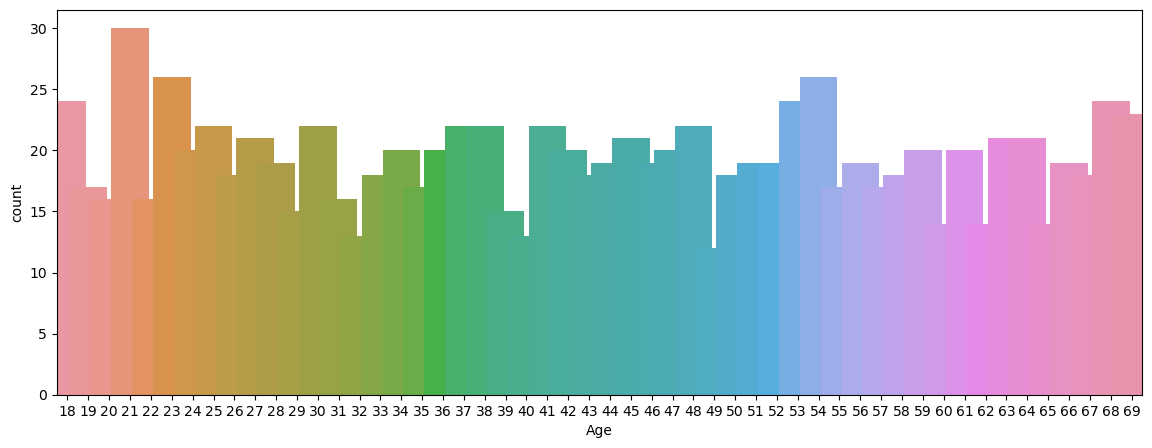

In [11]:
plt.figure(figsize=(14,5))
sns.countplot(x="Age", data=df,  width=1.8)

<Axes: >

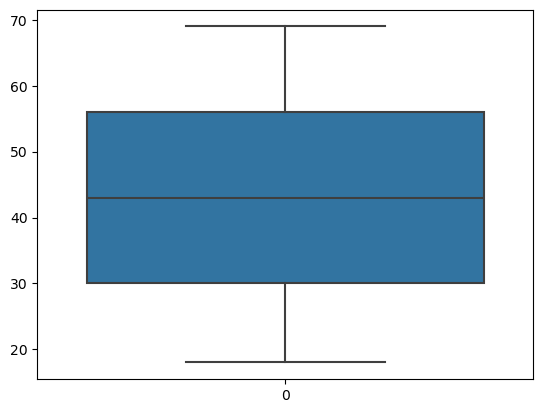

In [12]:
sns.boxplot(df["Age"])

In [13]:
df["Gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0      M
1      M
2      M
3      M
4      M
      ..
995    F
996    M
997    M
998    M
999    M
Name: Gender, Length: 1000, dtype: object>

In [14]:
df["Gender"].value_counts()

Gender
F    513
M    487
Name: count, dtype: int64

In [15]:
df["MaritalStatus"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Single
1       Married
2        Single
3       Widowed
4      Divorced
         ...   
995      Single
996     Widowed
997     Married
998     Widowed
999     Widowed
Name: MaritalStatus, Length: 1000, dtype: object>

In [16]:
df["MaritalStatus"].value_counts()

MaritalStatus
Widowed     276
Married     261
Divorced    248
Single      215
Name: count, dtype: int64

In [17]:
df["IncomeLevel"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Low
1         Low
2         Low
3         Low
4      Medium
        ...  
995       Low
996      High
997       Low
998      High
999       Low
Name: IncomeLevel, Length: 1000, dtype: object>

In [18]:
df["IncomeLevel"].value_counts()

IncomeLevel
High      349
Medium    326
Low       325
Name: count, dtype: int64

In [19]:
df=pd.DataFrame(df)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df["IncomeLevel"] = le.fit_transform(df["Gender"])
df["Gender"] = le.fit_transform(df["Gender"])

In [23]:
df["MaritalStatus"] = df["MaritalStatus"].map({
    "Single": 0,
    "Married": 1,
    "Divorced": 2,
    "Widowed": 3
})

In [24]:
print(df["MaritalStatus"].unique())

[0 1 3 2]


In [25]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,1,0,1
1,2,65,1,1,1
2,3,18,1,0,1
3,4,21,1,3,1
4,5,21,1,2,1


<Axes: xlabel='MaritalStatus'>

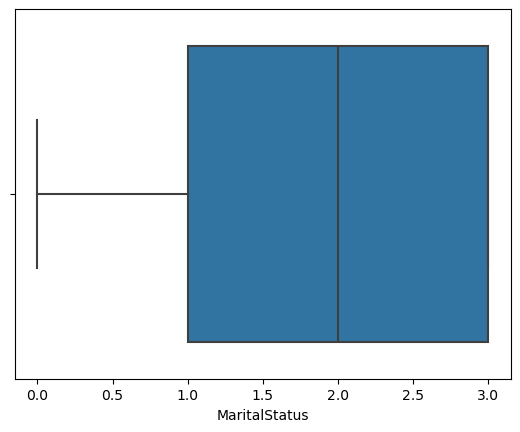

In [26]:
sns.boxplot(x=df["MaritalStatus"])

<Axes: xlabel='IncomeLevel'>

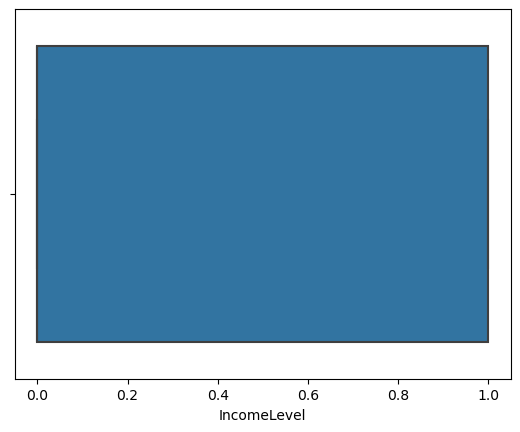

In [27]:
sns.boxplot(x=df["IncomeLevel"])

<Axes: xlabel='Gender'>

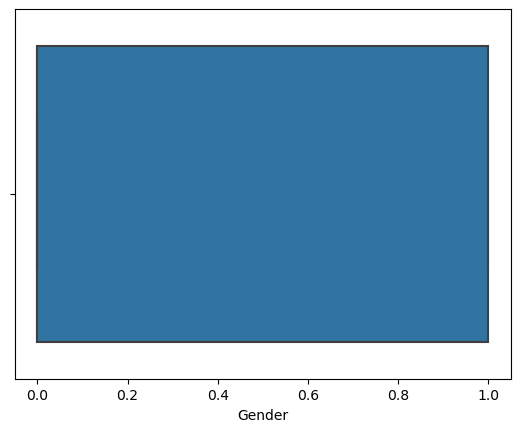

In [28]:
sns.boxplot(x=df["Gender"])

In [29]:
df.sample(3)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
697,698,63,0,2,0
941,942,28,0,1,0
988,989,55,1,2,1


In [30]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [31]:
x

,Age,Gender,MaritalStatus
0,62,1,0
1,65,1,1
2,18,1,0
3,21,1,3
4,21,1,2
...,...,...,...
995,54,0,0
996,19,1,3
997,47,1,1
998,23,1,3


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    1
Name: IncomeLevel, Length: 1000, dtype: int32

In [33]:
x.shape

(1000, 3)

In [34]:
y.shape

(1000,)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
# Logistic Regression (still used for classification, not regression)
from sklearn.linear_model import LogisticRegression

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Neural Network Regressor
from sklearn.neural_network import MLPRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [57]:
lr=LogisticRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
nr=MLPRegressor()
kn=KNeighborsRegressor()
ss=GridSearchCV

In [38]:
df.sample(3)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
471,472,27,0,3,0
117,118,66,1,2,1
155,156,34,0,3,0


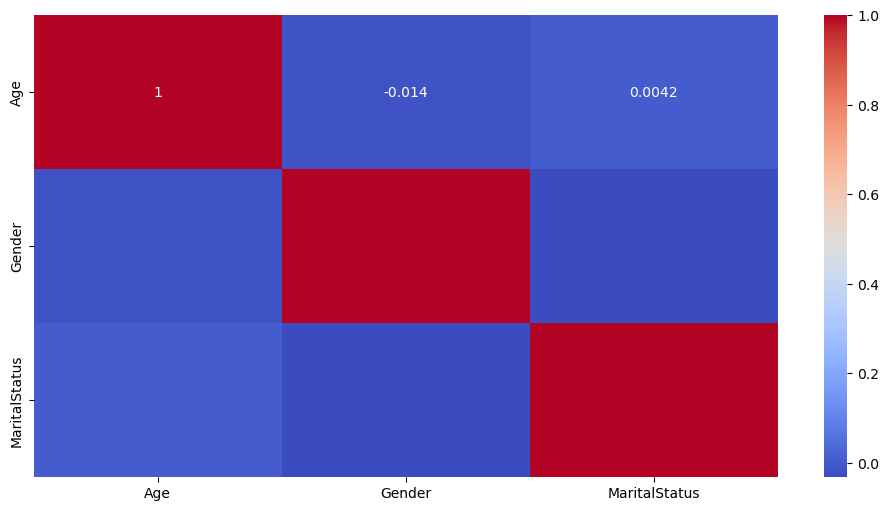

In [58]:
corr = x.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [59]:
df.corr()["IncomeLevel"].sort_values(ascending=False)

Gender           1.000000
IncomeLevel      1.000000
CustomerID       0.039515
Age             -0.013530
MaritalStatus   -0.032350
Name: IncomeLevel, dtype: float64

In [41]:
df["MaritalStatus"].duplicated().sum()

996

In [42]:
df["MaritalStatus"].value_counts()

MaritalStatus
3    276
1    261
2    248
0    215
Name: count, dtype: int64

In [60]:
lr=LogisticRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
nr=MLPRegressor()
kn=KNeighborsRegressor()
ss=GridSearchCV

In [69]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
gb.fit(x_train,y_train)
nr.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [87]:
y_pred1=lr.predict(x_test)
y_pred2=dt.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gb.predict(x_test)
y_pred5=nr.predict(x_test)
y_pred6=kn.predict(x_test)

In [88]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print("R2 Score of lr :",r2_score(y_test,y_pred1))
print("R2 Score of dt: ",r2_score(y_test,y_pred2))
print("R2 Score of rf: ",r2_score(y_test,y_pred3))
print("R2 Score of gb: ",r2_score(y_test,y_pred4))
print("R2 Score of nr: ",r2_score(y_test,y_pred5))
print("R2 Score of kn: ",r2_score(y_test,y_pred6))

R2 Score of lr : 1.0
R2 Score of dt:  1.0
R2 Score of rf:  1.0
R2 Score of gb:  0.9999999992863096
R2 Score of nr:  0.9997482874437057
R2 Score of kn:  0.8145323163388197


In [89]:
from sklearn.ensemble import BaggingRegressor
br= BaggingRegressor(random_state=1)
br.fit(x_train,y_train)

BaggingRegressor(random_state=1)

In [90]:
y_pred7= br.predict(x_test)

In [91]:
print("R2 Score of br",r2_score(y_test,y_pred7))

R2 Score of br 1.0


In [92]:
y_pred7 = br.predict(x_test)

print('Training Coefficient of R^2 : %.3f'%br.score(x_train, y_train))
print('Test Coefficient of R^2 : %.3f'%br.score(x_test, y_test))

Training Coefficient of R^2 : 1.000
Test Coefficient of R^2 : 1.000


In [98]:
# 1️⃣ Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# 2️⃣ Prepare your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3️⃣ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=1000),
    "KNN Regressor": KNeighborsRegressor()
}

# 4️⃣ Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# 5️⃣ Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2", ascending=False)
print(results_df)

                         R2           MSE          RMSE           MAE
Linear Regression  1.000000  2.195576e-32  1.481747e-16  1.156948e-16
Decision Tree      1.000000  0.000000e+00  0.000000e+00  0.000000e+00
Random Forest      1.000000  0.000000e+00  0.000000e+00  0.000000e+00
Gradient Boosting  1.000000  1.777803e-10  1.333343e-05  1.331855e-05
MLP Regressor      0.997458  6.331757e-04  2.516298e-02  2.043310e-02
KNN Regressor      0.814532  4.620000e-02  2.149419e-01  1.430000e-01


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor()
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
1.0


Best model: Linear Regression with R2 = 1.0000


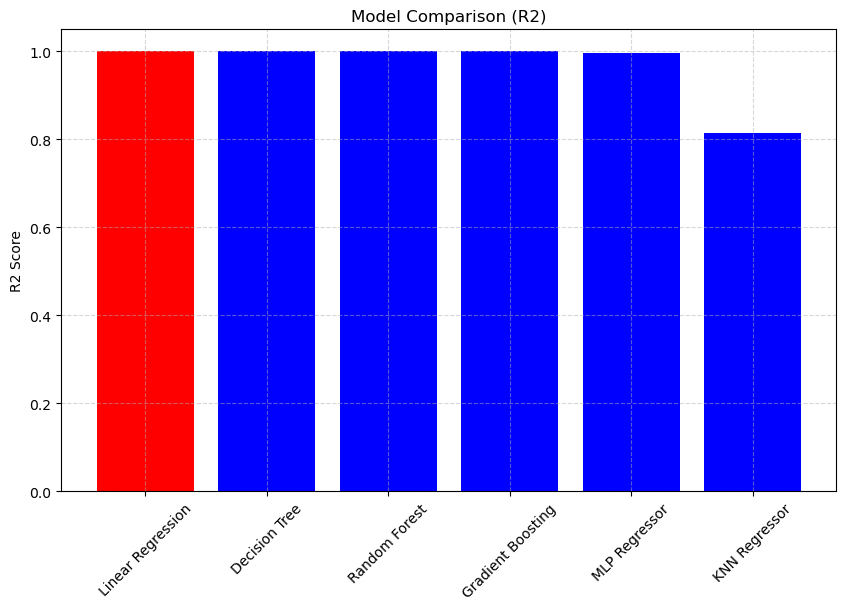

In [102]:
# Suppose 'results' looks like this:
# results = {
#   "Linear Regression": {"R2": 0.85, "RMSE": 3.2, "MAE": 2.1},
#   "Decision Tree": {"R2": 0.80, "RMSE": 3.5, "MAE": 2.3},
#   ...
# }

# 1️⃣ Choose metric to compare, e.g., R2
metric = 'R2'

# 2️⃣ Extract metric values for all models
metric_values = {model: scores[metric] for model, scores in results.items()}

# 3️⃣ Find best model
best_model = max(metric_values, key=metric_values.get)
best_score = metric_values[best_model]
print(f"Best model: {best_model} with {metric} = {best_score:.4f}")

# 4️⃣ Highlight best model in plot
colors = ['red' if model == best_model else 'blue' for model in metric_values.keys()]

# 5️⃣ Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(metric_values.keys(), metric_values.values(), color=colors)
plt.ylabel(f'{metric} Score')
plt.title(f'Model Comparison ({metric})')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [112]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1️⃣ Get the best model object
best_model_obj = models[best_model]  # 'models' dictionary contains all trained models

# 2️⃣ Save it as a .pkl file
with open("best_modelLL.pkl", "wb") as f:
    pickle.dump(best_model_obj, f)

print(f"Best model '{best_model}' saved as best_model.pkl")

Best model 'Linear Regression' saved as best_model.pkl


In [114]:
# Load the model
with open("best_modelLL.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make predictions
y_pred = loaded_model.predict(x_test)  # X_new = new input data

In [117]:
# Load trained model
with open("best_modelLL.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Prediction with loaded model
y_pred = loaded_model.predict(x_test)

print("Loaded model score:", loaded_model.score(x_test, y_test))

Loaded model score: 1.0
